In [1]:
import numpy as np
import scipy as sp
from scipy.fft import fft2
from scipy.fft import ifft2
from scipy.fft import fftfreq
from scipy.fft import fftshift
import imageio
import cv2

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import animation
from matplotlib.animation import PillowWriter
import pint

u = pint.UnitRegistry()

### Input image of object here 250 x 250 px

c:\Users\prath\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:733: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.array(x, subok=True, copy=copy)


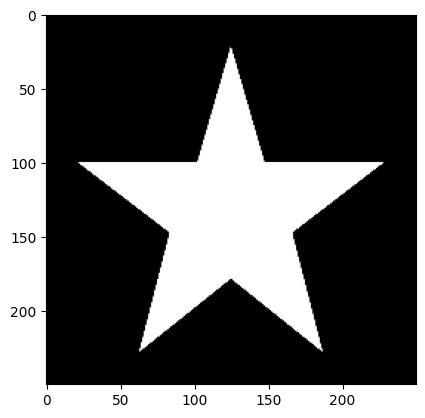

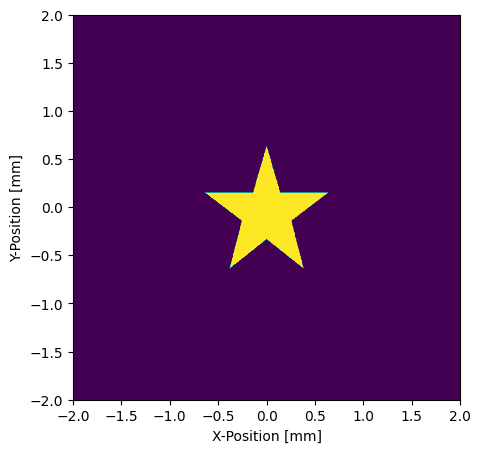

In [2]:
img = cv2.imread('images/star.jpg')
plt.imshow(img, cmap='gray')
img = np.pad(img, 200, mode='constant')
img = cv2.resize(img, dsize=(1600, 1600), interpolation=cv2.INTER_CUBIC)
U0 = np.array(img).sum(axis=2).astype(float)

x = np.linspace(-2,2,1600) * u.mm
xv, yv = np.meshgrid(x, x)
lam = 600*u.nm

plt.figure(figsize=(5,5))
plt.pcolormesh(xv,-yv,U0)
plt.xlabel('X-Position [mm]')
plt.ylabel('Y-Position [mm]')
plt.show()

#### Define a funtion to get FT and IFT

In [4]:
def compute_U(U0, xv, yv, lam, z):
    A = fft2(U0)
    kx = 2*np.pi * fftfreq(len(x), np.diff(x)[0])
    kxv, kyv = np.meshgrid(kx,kx)
    k = 2*np.pi/lam
    return ifft2(A*np.exp(1j*z*np.sqrt(k**2-kxv**2-kyv**2)))

### Plotting the pattern

c:\Users\prath\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\fft\_pocketfft\helper.py:103: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)


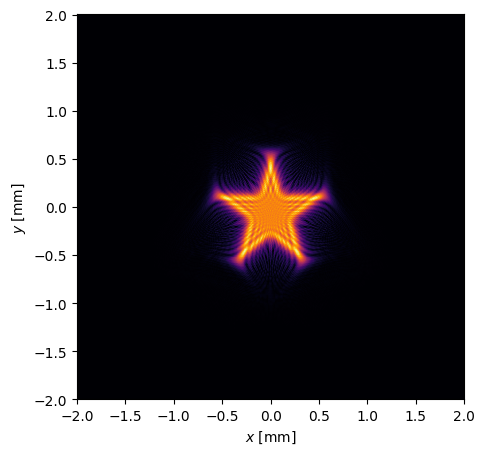

In [5]:
U = compute_U(U0, xv, yv, lam, z=1*u.cm)

plt.figure(figsize=(5,5))
plt.pcolormesh(xv,-yv,np.abs(U), cmap='inferno')
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.show()

### Animation for increasing screen-object distance

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.set_xlabel('X-Position [mm]')
ax.set_ylabel('Y-Position [mm]')

def animate(i):
    if i%10==0: print(i)
    U = compute_U(U0, xv, yv, lam, z=0.06*i*u.cm)
    ax.imshow(np.abs(U), cmap='inferno')
    
ani = animation.FuncAnimation(fig, animate, frames=100, interval=50)
ani.save('star.gif',writer='pillow',fps=10,dpi=100)